# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

หนังที่ใช้ทุนสร้างมากขึ้นจะมีได้รายได้จากการขายตั๋วภาพยนตร์มากขึ้นหรือไม่? มาดูว่ามีความสัมพันธ์หรือไม่ โดยใช้ข้อมูลงบประมาณภาพยนตร์และผลประกอบการทางการเงินที่ผมดึงข้อมูลจาก [the-numbers.com](https://www.the-numbers.com/movie/budgets) เมื่อวันที่ 1 พฤษภาคม 2018


<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [60]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression


# Notebook Presentation

In [61]:
pd.options.display.float_format = '{:,.2f}'.format

register_matplotlib_converters()

# Read the Data

In [62]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
**Challenge**: ตอบคำถามเหล่านี้เกี่ยวกับชุดข้อมูล:
- How many rows and columns does the dataset contain?
- ชุดข้อมูลมีกี่แถวและคอลัมน์?

- Are there any NaN values present?
- มีค่า NaN อยู่หรือไม่?

- Are there any duplicate rows?
- มีแถวที่ซ้ำกันหรือไม่?

- What are the data types of the columns?
- ประเภทของข้อมูลในคอลัมน์คืออะไร?

In [63]:
print("rows and columns:", data.shape)

rows and columns: (5391, 6)


In [64]:
print(f"Any NaN values among the data?  {data.isna().values.any()}")
print(f"Any duplicates? {data.duplicated().values.any()}")

duplicated_rows = data[data.duplicated()]
print(f"Number of duplicates: {len(duplicated_rows)}")

Any NaN values among the data?  False
Any duplicates? False
Number of duplicates: 0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.



แปลงคอลัมน์ USD_Production_Budget, USD_Worldwide_Gross, และ USD_Domestic_Gross เป็นรูปแบบตัวเลขโดยการลบเครื่องหมาย $ และ , ออก
<br>
<br>
Note:  *domestic* ในข้อมูลนี้หมายถึงสหรัฐอเมริกา

In [66]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "", regex=True)
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


In [68]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

**Challenge**: แปลง `Release_Date` column ไปเป็น Pandas Datetime type. 

In [69]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.head(2)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?


---
**Challenge**: 

1. ค่าเฉลี่ยของงบประมาณในการผลิตภาพยนตร์ในชุดข้อมูลคืออะไร?
2. ค่าเฉลี่ยของรายได้จากการขายทั่วโลกของภาพยนตร์คืออะไร?
3. ค่าขั้นต่ำของรายได้จากการขายทั่วโลกและรายได้ในประเทศ (domestic) คืออะไร?
4. ภาพยนตร์ 25% แรกในชุดข้อมูลนั้นมีกำไรจริงหรือสูญเสียเงิน?
5. ภาพยนตร์ที่มีงบประมาณในการผลิตสูงสุดและภาพยนตร์ที่มีรายได้จากการขายทั่วโลกสูงสุดคืออะไร?
6. ภาพยนตร์ที่มีงบประมาณต่ำสุดและภาพยนตร์ที่มีรายได้สูงสุดได้รับเงินรายได้เท่าไร?


In [70]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [71]:
data[data.USD_Production_Budget == 425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [72]:
data[data.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

**Challenge** มีภาพยนตร์กี่เรื่องที่ไม่ได้รับรายได้ในประเทศ (domestically) คือ $0? และภาพยนตร์ที่มีงบประมาณสูงสุดแต่ไม่ได้รับรายได้เลยคืออะไร?

In [73]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

**Challenge**: มีภาพยนตร์กี่เรื่องที่ไม่ได้รับรายได้ทั่วโลก (worldwide) คือ $0? และภาพยนตร์ที่มีงบประมาณสูงสุดแต่ไม่ได้รับรายได้ที่ระดับนานาชาติคืออะไร?

In [74]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [75]:
bool_list1 = [True, True, False, False]
bool_list2 = [False, True, True, False]

np.array(bool_list1) & np.array(bool_list2)

array([False,  True, False, False])

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.


**Challenge**: ใช้ [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) เพื่อทำสิ่งเดียวกัน สร้างชุดข้อมูลย่อยสำหรับการเผยแพร่ระดับนานาชาติที่มีรายได้จากการขายทั่วโลก แต่ไม่ได้รับรายได้ในสหรัฐอเมริกา

Hint: ในครั้งนี้คุณจะต้องใช้คำสั่ง  `and` 

In [76]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

**Challenge**:

* ระบุภาพยนตร์ที่ยังไม่เข้าฉายตามเวลาที่เก็บข้อมูล (1 พฤษภาคม 2018)
* มีภาพยนตร์กี่เรื่องในชุดข้อมูลที่ยังไม่ได้มีโอกาสเข้าฉายในโรงภาพยนตร์?
* สร้าง DataFrame อีกชุดที่ชื่อว่า data_clean โดยไม่รวมภาพยนตร์เหล่านี้ลงไปในชุดข้อมูล

In [77]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [78]:
future_releases = data[data.Release_Date >= scrape_date]
print(f"Number of unrelease moview: {len(future_releases)}")
future_releases

Number of unrelease moview: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

**Challenge**: 
เปอร์เซ็นต์ของภาพยนตร์ที่ค่าใช้จ่ายในการผลิตเกินรายได้จากการขายทั่วโลกหรือไม่?

In [79]:
data_clean = data.drop(future_releases.index)
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


# Seaborn for Data Viz: Bubble Charts

In [80]:
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(money_losing)/len(data_clean)

0.37277117384843983

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

**Challenge**: สร้าง Bubble Chart ตามรูปด้านล่าง:

<img src=https://i.imgur.com/8fUn9T6.png>



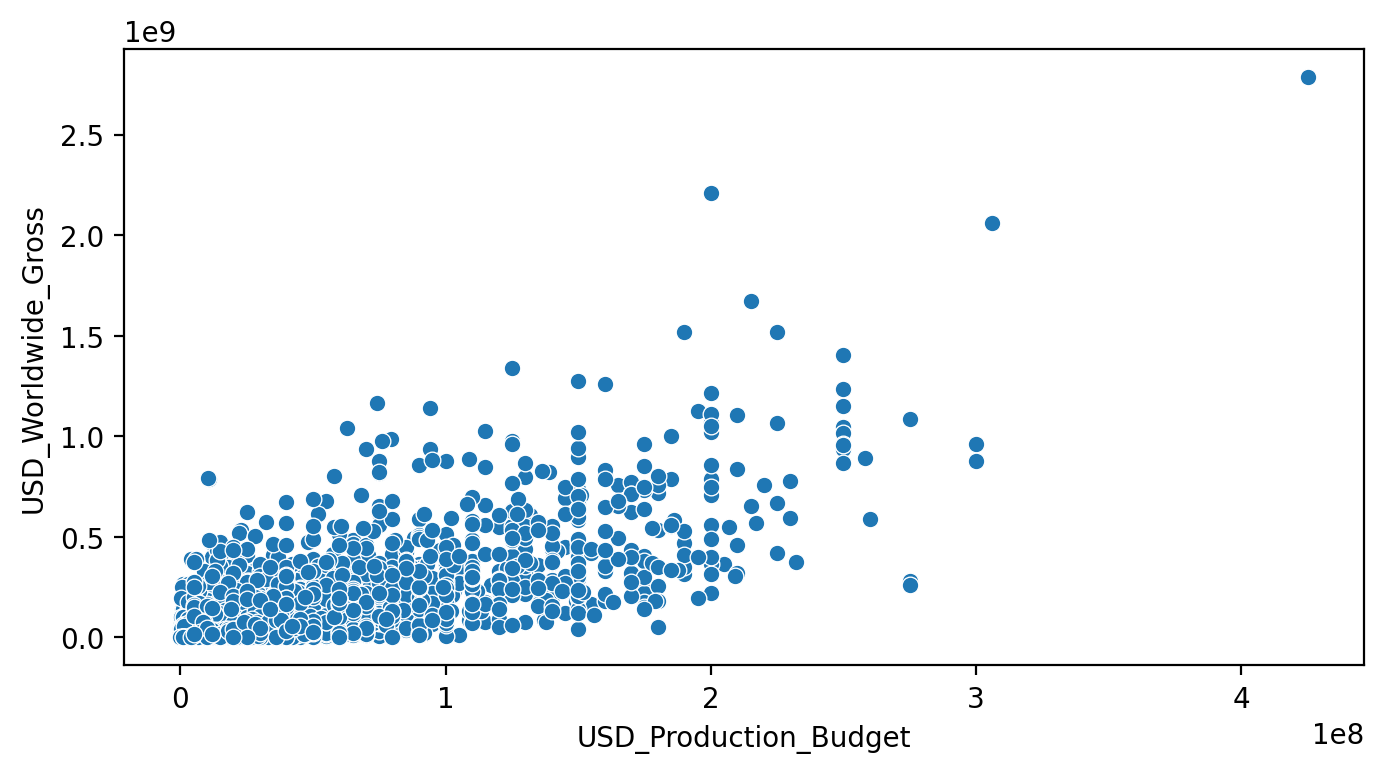

In [81]:
plt.figure(figsize=(8,4), dpi=200)

sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

plt.show()

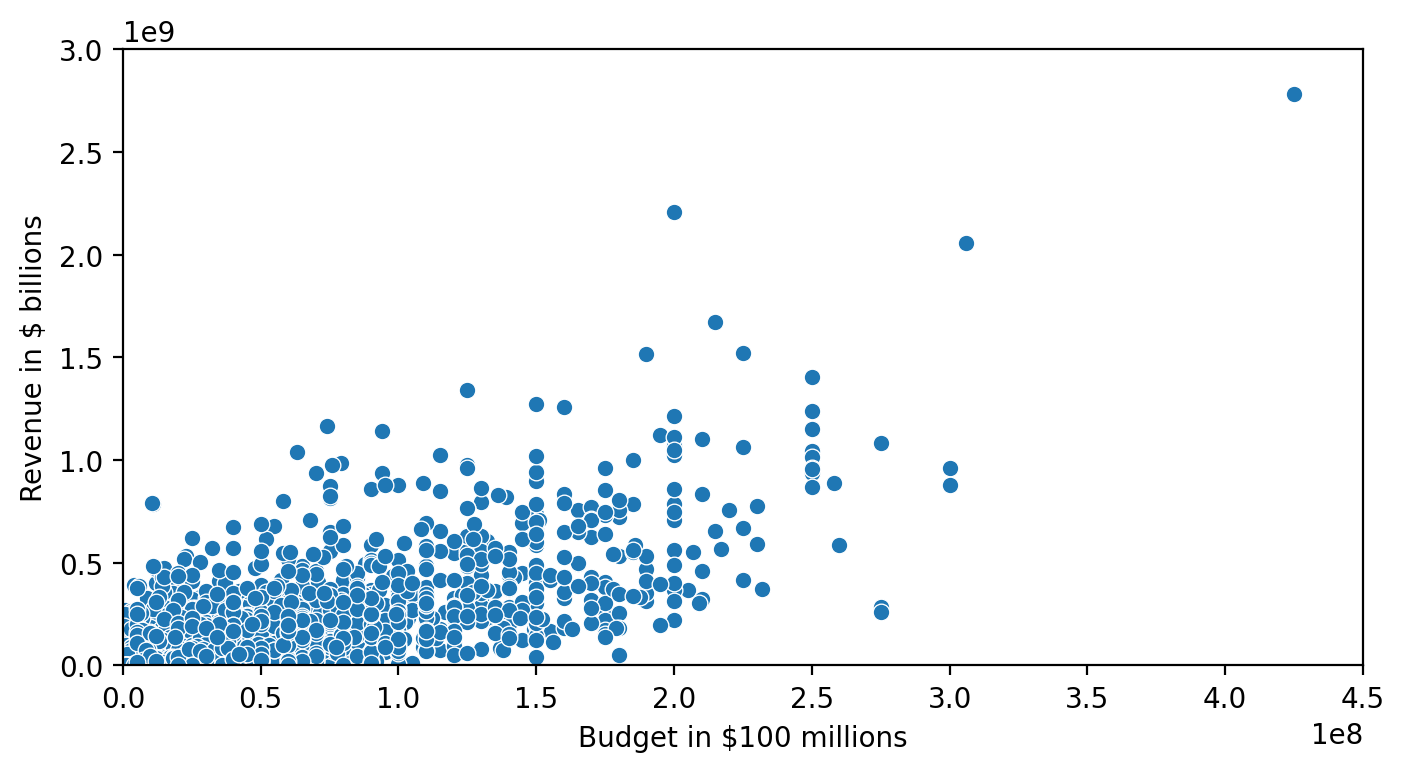

In [82]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

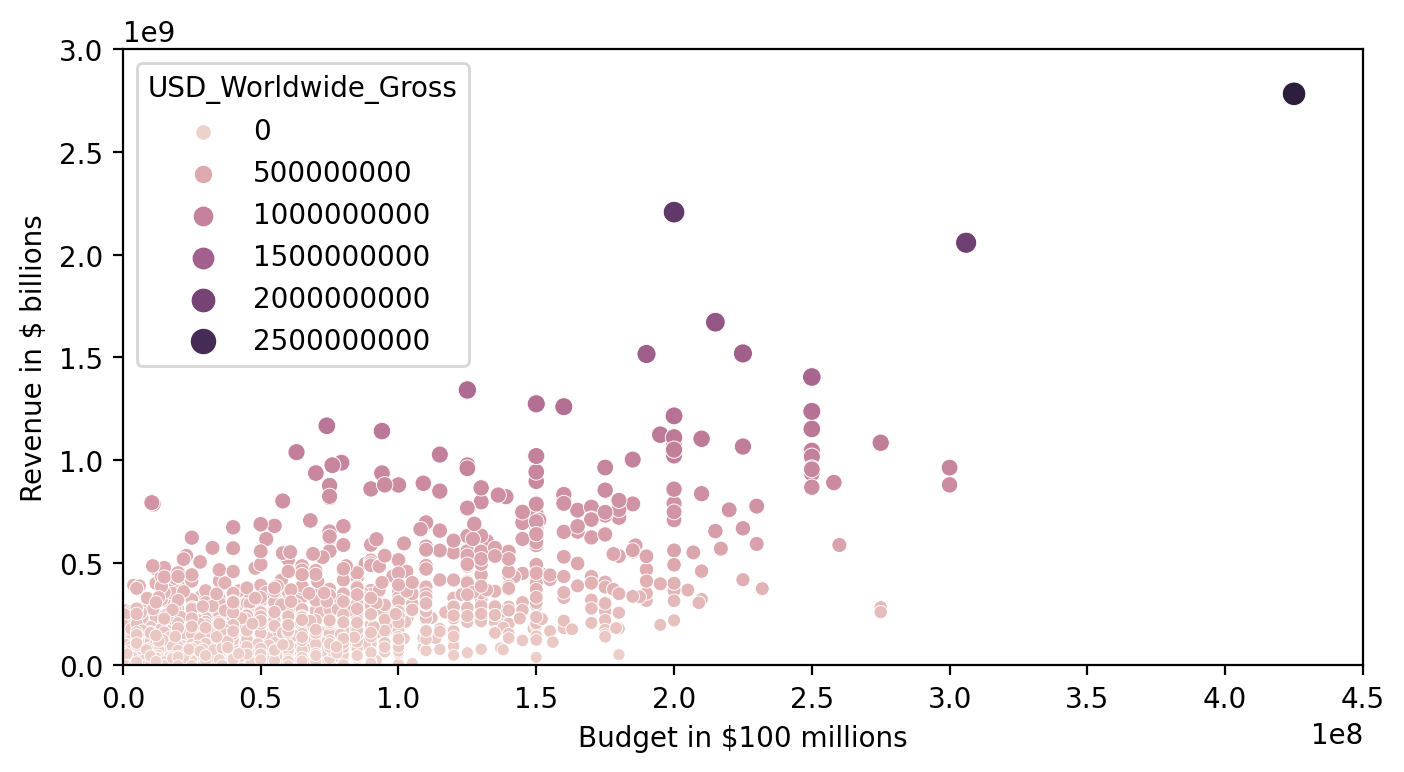

In [83]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

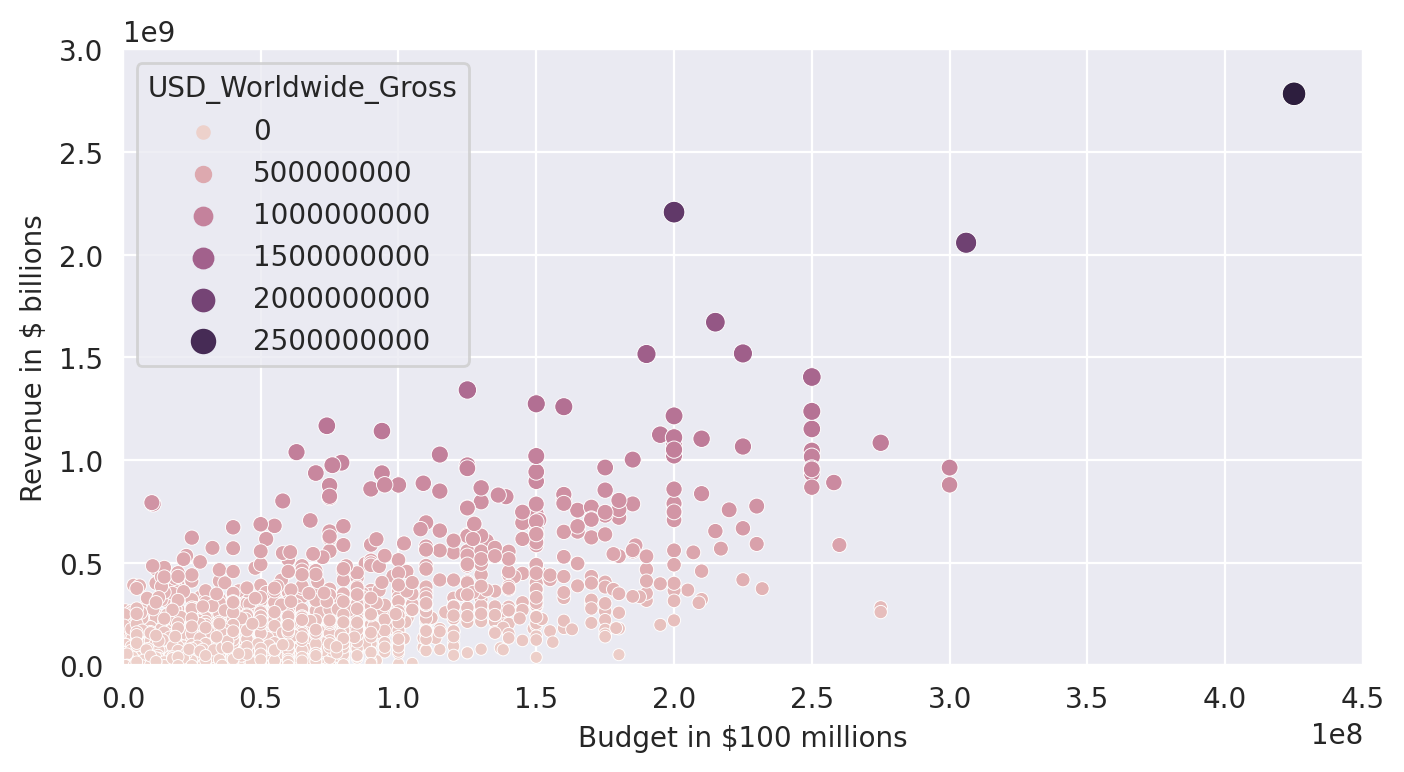

In [84]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')


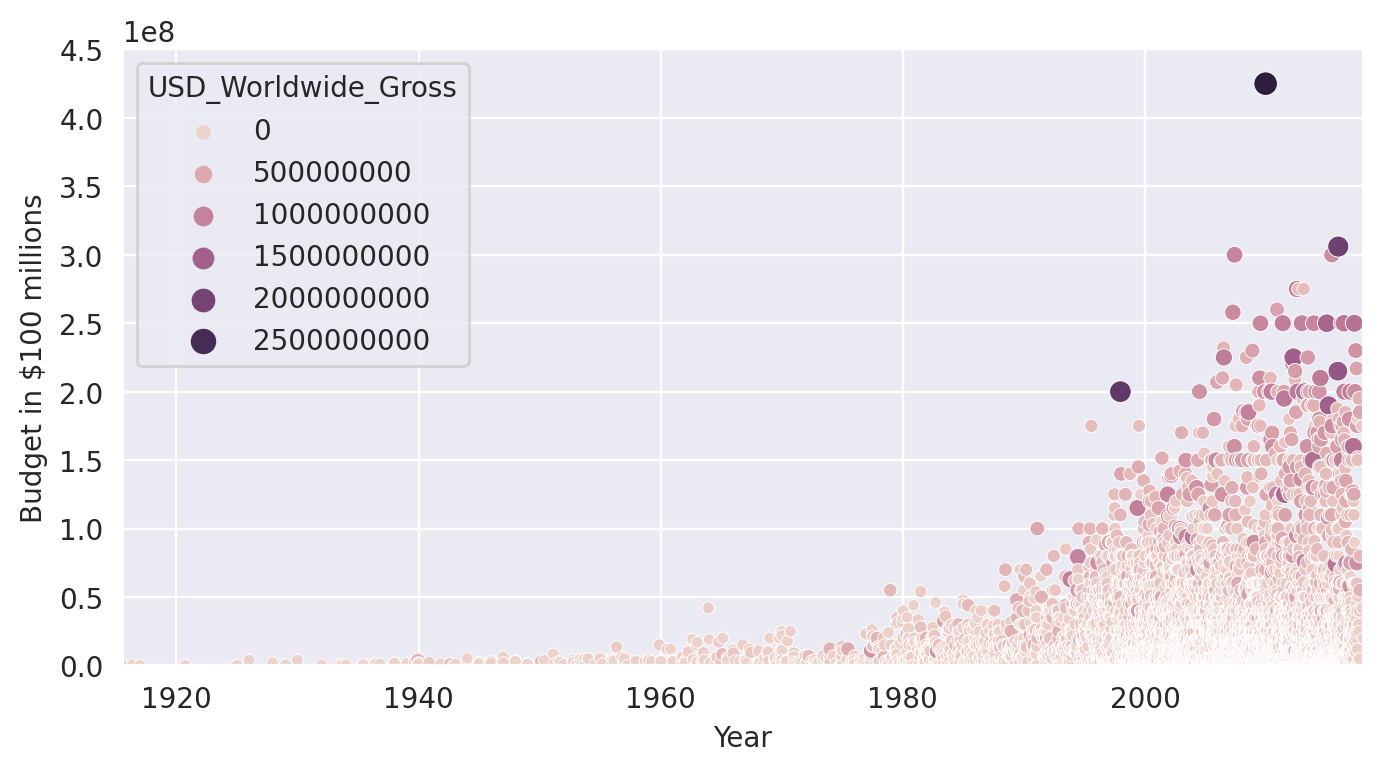

In [85]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')
 

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

**Challenge**: สร้าง column ใน `data_clean` ที่ระบุทศวรรษการเผยแพร่ (decade of the release)

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.


นี่คือวิธีการ:
1. สร้าง DatetimeIndex object จากคอลัมน์ Release_Date.
2. เก็บข้อมูลปีทั้งหมดจาก DatetimeIndex object โดยใช้ .year property.
3. ใช้การหารจัดเศษ // เพื่อแปลงข้อมูลปีเป็นทศวรรษของภาพยนตร์.
4. เพิ่มทศวรรษเป็นคอลัมน์ชื่อ Decade ใน DataFrame data_clean 


In [86]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

print(data_clean.Release_Date)
print(dt_index)
print(years)


0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5379   2017-10-02
5380   2017-10-03
5381   2017-12-05
5382   2017-12-05
5383   2017-12-31
Name: Release_Date, Length: 5384, dtype: datetime64[ns]
DatetimeIndex(['1915-08-02', '1916-05-09', '1916-12-24', '1920-09-17',
               '1925-01-01', '1925-12-30', '1927-12-08', '1929-01-02',
               '1930-01-01', '1931-12-31',
               ...
               '2017-08-25', '2017-09-06', '2017-09-06', '2017-10-02',
               '2017-10-02', '2017-10-02', '2017-10-03', '2017-12-05',
               '2017-12-05', '2017-12-31'],
              dtype='datetime64[ns]', name='Release_Date', length=5384, freq=None)
Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)


In [87]:
decades = years//10*10
data_clean['Decade'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?


**Challenge**: สร้าง DataFrame 2 ตัว: `old_films` และ `new_films`
* `old_films` ควรรวมภาพยนตร์ทั้งหมดก่อนปี 1969 (รวมถึงปี 1969)
* `new_films` ควรรวมภาพยนตร์ทั้งหมดตั้งแต่ปี 1970 เป็นต้นไป
* มีภาพยนตร์กี่เรื่องที่เผยแพร่ก่อนปี 1970?
* ภาพยนตร์ที่ค่าใช้จ่ายสูงสุดก่อนปี 1970 คืออะไร?

In [88]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

In [89]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


In [90]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

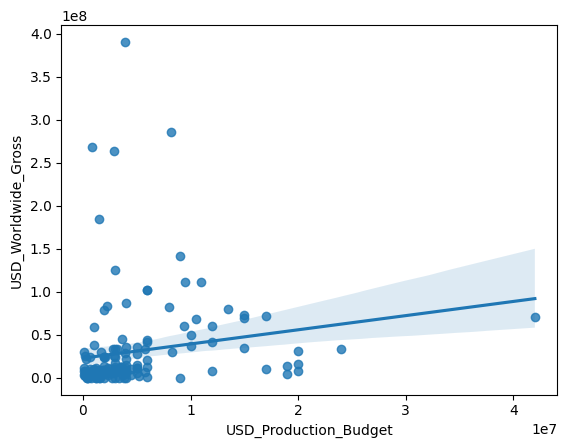

In [91]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 

**Challenge**: ใช้ Seaborn's `.regplot()` แสดง scatter plot และ linear regression line เปรียบเทียบ `new_films`. 
<br>
<br>
Style the chart

Style ของ chart

* Put the chart on a `'darkgrid'`.
* ใส่ chart บน `'darkgrid'`
* Set limits on the axes so that they don't show negative values.
* ตั้งค่าขอบเขต axes ให้ไม่แสดงค่าที่เป็นลบ
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* ตั้งชื่อแกน "Revenue in \$ billions" และ "Budget in \$ millions"
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).
* ใช้รหัสสี HEX สำหรับ plot และ regression line โดย dots เป็น dark blue (#2f4b7c) และเส้นสีส้ม orange (#ff7c43)



Interpret the chart

อธิบายกราฟ Chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* ข้อมูลของภาพยนตร์ใหม่มีความสัมพันธ์ linear regression ดีกว่าหรือแย่กว่าภาพยนตร์เก่า?
* Roughly how much would a film with a budget of $150 million make according to the regression line?
* โดยประมาณภาพยนตร์ที่มีงบประมาณ $150 ล้านจะสร้างรายได้ประมาณเท่าไรตาม linear regression?




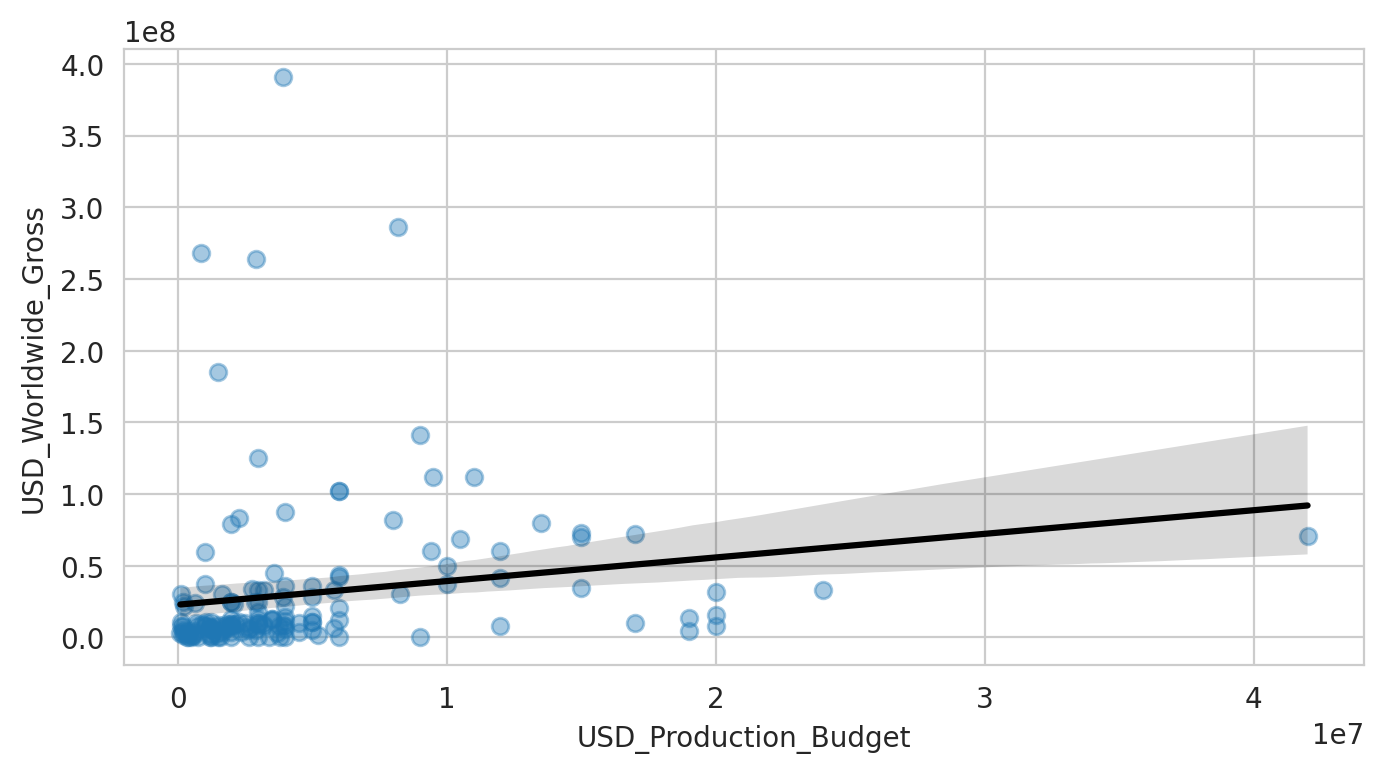

In [92]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

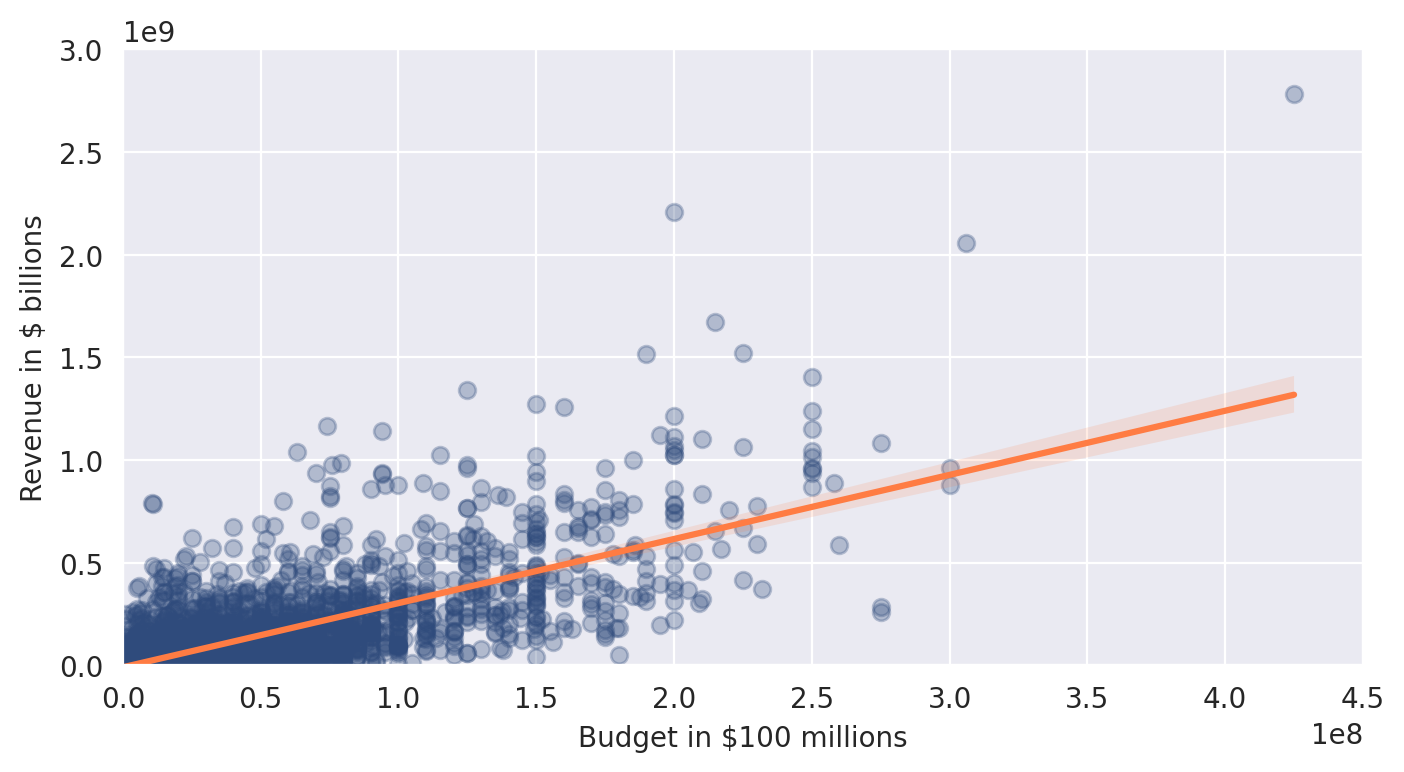

In [93]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [94]:
regression = LinearRegression()

In [95]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

In [96]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [97]:
regression.intercept_

array([-8650768.00661027])

In [98]:
regression.coef_

array([[3.12259592]])

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

**Challenge**: รัน linear regression สำหรับ `old_films`  คำนวณ intercept, slope และ r-squared ว่าสมการเชิงเส้นอธิบายความแปรปรวนของรายได้จากภาพยนตร์ในกรณีนี้เป็นเท่าใด?


In [99]:
# R-squared
regression.score(X, y)

0.5577032617720403

In [100]:
x = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

regression.fit(x, y)
print(f"The slope coefficient is: {regression.coef_[0]}")
print(f"The intercept is: {regression.intercept_[0]}")
print(f"The r-squared is: {regression.score(x, y)}")

The slope coefficient is: [1.64771314]
The intercept is: 22821538.635080386
The r-squared is: 0.02937258620576877


In [101]:
22821538 + 1.64771314 * 350000000


599521137.0

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

เราเพิ่งประมาณค่า slope และ intercept  จำไว้ว่า Linear Model ของเรามีรูปแบบดังนี้:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

**Challenge**:  Model ของเราประมาณรายได้รวมทั่วโลกเท่าใดสำหรับภาพยนตร์ที่มีงบประมาณ $350 ล้าน?

In [102]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
